In [3]:
import pandas as pd
import math
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

### Import SPARSE.csv

In [5]:
df_SPARSE = pd.read_csv("combinedResults(SPARSE).csv")
df_SPARSE

,Vertices,Edges,Time Array (Method 1),Time Array (Method 2),Density,Matrix Memory (bytes),List Memory (bytes)
0,197,196,30874,5190,0.010152,155236,2352
1,926,925,20191,4942,0.002160,3429904,11100
2,258,257,30843,14631,0.007752,266256,3084
3,783,782,2447,503,0.002554,2452356,9384
4,857,856,18603,2380,0.002334,2937796,10272
...,...,...,...,...,...,...,...
995,188,187,10158,1440,0.010638,141376,2244
996,100,99,238,69,0.020000,40000,1188
997,880,879,1707,191,0.002273,3097600,10548
998,784,783,1535,179,0.002551,2458624,9396


### Import Dense.csv

In [60]:
import pandas as pd

# Load the dataset
df_dense_raw = pd.read_csv("combinedResults.csv")
df_dense_raw

# Filter the dataset to include only graphs where density > 0.5
df_dense = df_dense_raw[df_dense_raw['Density'] > 0.5]
df_dense


,Vertices,Edges,Time Array (Method 1),Time Array (Method 2),Density,Matrix Memory (bytes),List Memory (bytes)
0,867,587633,3548064,7383804,1.565306,3006756,7051596
1,854,711065,2049871,13089047,1.952236,2917264,8532780
2,755,350427,2957553,9564427,1.231145,2280100,4205124
4,690,140721,2238295,2937943,0.591998,1904400,1688652
5,670,120867,2061634,3232226,0.539308,1795600,1450404
...,...,...,...,...,...,...,...
994,190,26478,180445,508474,1.474687,144400,317736
995,770,297594,3078743,3622076,1.005164,2371600,3571128
996,814,221329,3281078,3229495,0.668888,2650384,2655948
998,275,74061,237728,968298,1.965786,302500,888732


Method1: Adjacency matrix & Array for priority queue <br>
Method2: Adjacency lists & Minimizing heap for priority queue <br><br>
### Separating Data

In [63]:
method1_df_SPARSE = df_SPARSE[['Vertices','Edges','Time Array (Method 1)']].copy()
method1_df_SPARSE

,Vertices,Edges,Time Array (Method 1)
0,197,196,30874
1,926,925,20191
2,258,257,30843
3,783,782,2447
4,857,856,18603
...,...,...,...
995,188,187,10158
996,100,99,238
997,880,879,1707
998,784,783,1535


In [65]:
method2_df_SPARSE = df_SPARSE[['Vertices','Edges','Time Array (Method 2)']].copy()
method2_df_SPARSE

,Vertices,Edges,Time Array (Method 2)
0,197,196,5190
1,926,925,4942
2,258,257,14631
3,783,782,503
4,857,856,2380
...,...,...,...
995,188,187,1440
996,100,99,69
997,880,879,191
998,784,783,179


In [67]:
method1_df_dense = df_dense[['Vertices','Edges','Time Array (Method 1)']].copy()
method1_df_dense

,Vertices,Edges,Time Array (Method 1)
0,867,587633,3548064
1,854,711065,2049871
2,755,350427,2957553
4,690,140721,2238295
5,670,120867,2061634
...,...,...,...
994,190,26478,180445
995,770,297594,3078743
996,814,221329,3281078
998,275,74061,237728


In [69]:
method2_df_dense = df_dense[['Vertices','Edges','Time Array (Method 2)']].copy()
method2_df_dense

,Vertices,Edges,Time Array (Method 2)
0,867,587633,7383804
1,854,711065,13089047
2,755,350427,9564427
4,690,140721,2937943
5,670,120867,3232226
...,...,...,...
994,190,26478,508474
995,770,297594,3622076
996,814,221329,3229495
998,275,74061,968298


In [71]:
# Theoretical complexity functions for worst-case dense graphs
def matrix_array_complexity(V):
    return V ** 2  # Worst-case complexity for adjacency matrix with array-based priority queue

def list_heap_complexity_dense(V, E):
    return (V + E) * math.log(V)  # Worst-case complexity for adjacency list with heap-based priority queue in dense graph


### Plot Graphs for Method 1
1. Time complexity with respect to Vertices
2. Time complexity with respect to Edges

#### SPARSE Dataset

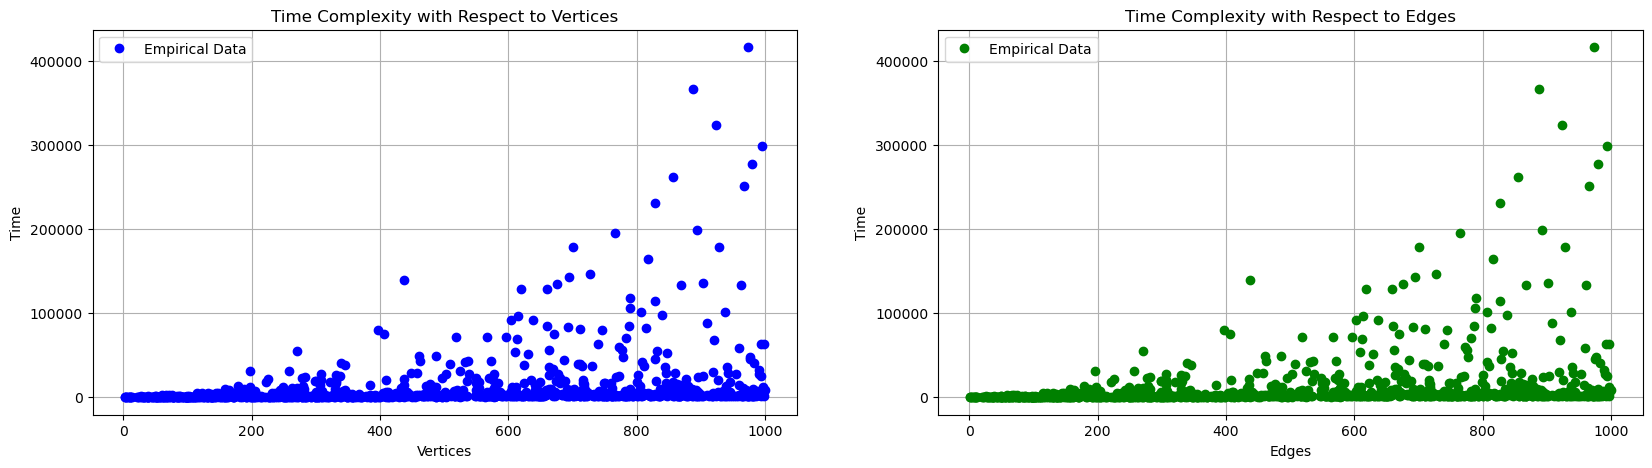

In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a range of vertices for the theoretical line
vertices = np.linspace(min(method1_df_SPARSE['Vertices']), max(method1_df_SPARSE['Vertices']), 100)
vertices_squared = vertices ** 2

# Plot the graphs
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot the first graph with Vertices vs Time
ax[0].plot(method1_df_SPARSE['Vertices'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b', label='Empirical Data')
# ax[0].plot(vertices, vertices_squared, '-', color='r', label='$|V|^2$ Trend Line')
ax[0].set_title('Time Complexity with Respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)
ax[0].legend()

# Plot the second graph with Edges vs Time
ax[1].plot(method1_df_SPARSE['Edges'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='g', label='Empirical Data')
# ax[1].plot(vertices, vertices_squared, '-', color='r', label='$|V|^2$ Trend Line')
ax[1].set_title('Time Complexity with Respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)
ax[1].legend()

plt.show()


#### Dense Dataset

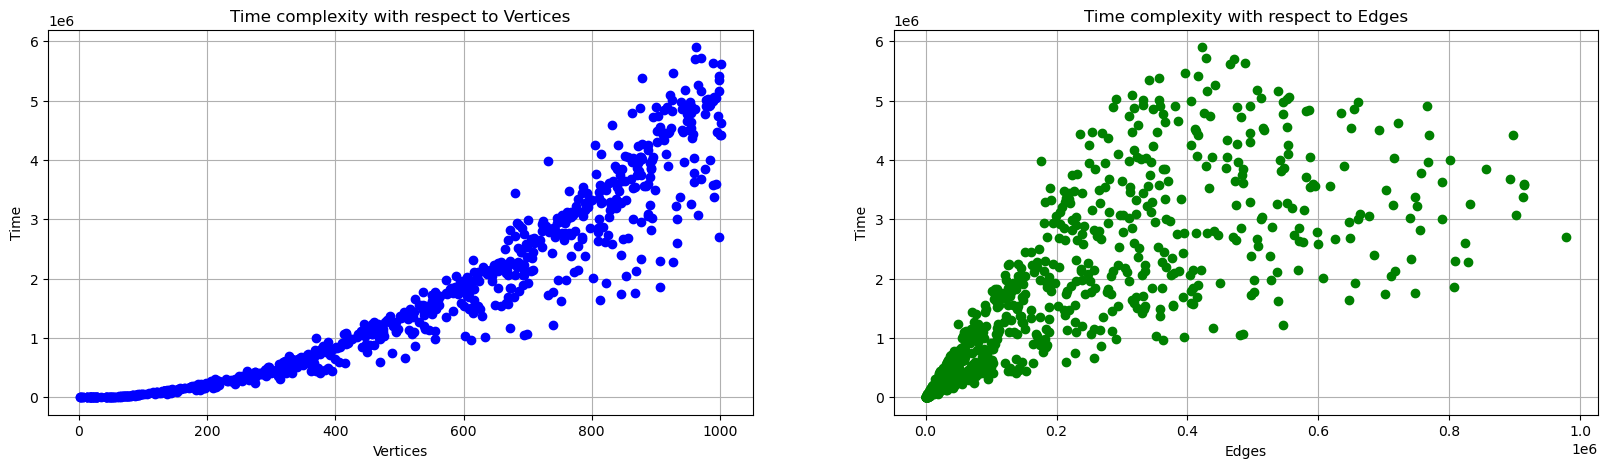

In [82]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='b')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 'o', color='g')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

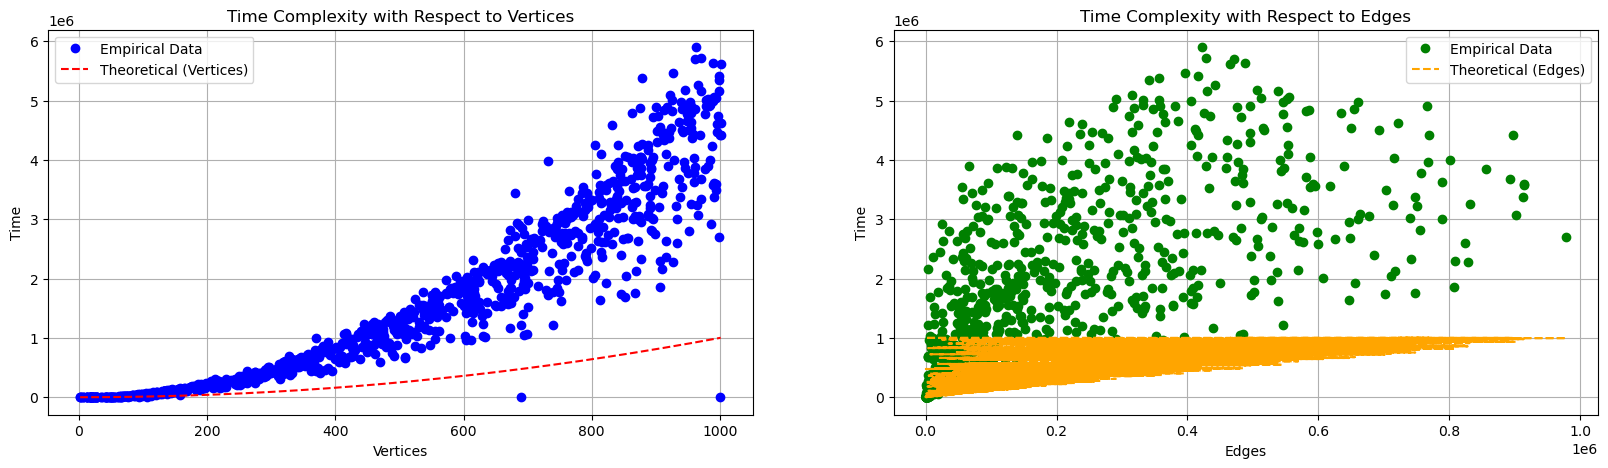

In [90]:
# Applying the theoretical complexities to the dataframe
df_dense['Matrix_Array_Complexity'] = df_dense['Vertices'].apply(matrix_array_complexity)
df_dense['List_Heap_Complexity'] = df_dense.apply(lambda row: list_heap_complexity_dense(row['Vertices'], row['Edges']), axis=1)

df_dense = df_dense.sort_values(by='Vertices')

fig, ax = plt.subplots(1, 2, figsize=(20, 5))

ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='b', label='Empirical Data')
ax[0].plot(df_dense['Vertices'], df_dense['Matrix_Array_Complexity'], color='red', linestyle='--', label='Theoretical (Vertices)')
ax[0].set_title(f'Time Complexity with Respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 'o', color='g', label='Empirical Data')
ax[1].plot(df_dense['Edges'], df_dense['Matrix_Array_Complexity'], color='orange', linestyle='--', label='Theoretical (Edges)')
ax[1].set_title(f'Time Complexity with Respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)
ax[1].legend()

plt.show()


#### SPARSE and Dense Combined

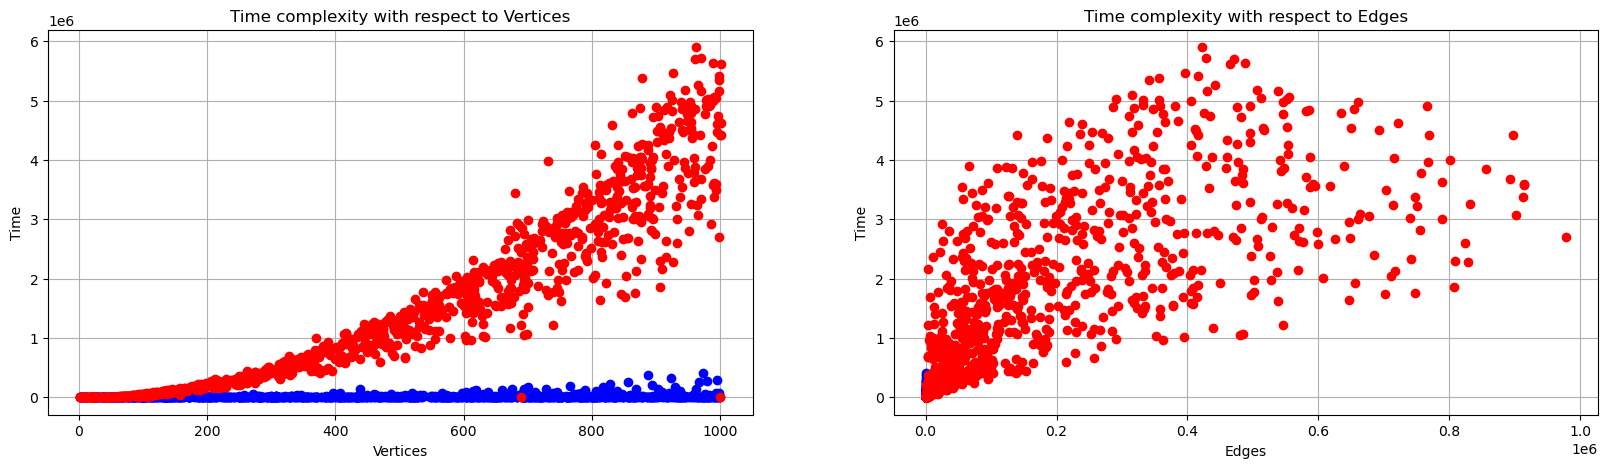

In [17]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method1_df_SPARSE['Vertices'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b')
ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='r')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method1_df_SPARSE['Edges'], method1_df_SPARSE['Time Array (Method 1)'], 'o', color='b')
ax[1].plot(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 'o', color='r')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

In [18]:
df_SPARSE['Edges'].nunique()

630

In [19]:
df_dense['Vertices'].nunique()

631

In [20]:
df_dense['Edges'].nunique()

994

### Plot Graphs for Method 2
1. Time complexity with respect to Vertices
2. Time complexity with respect to Edges

#### SPARSE Dataset

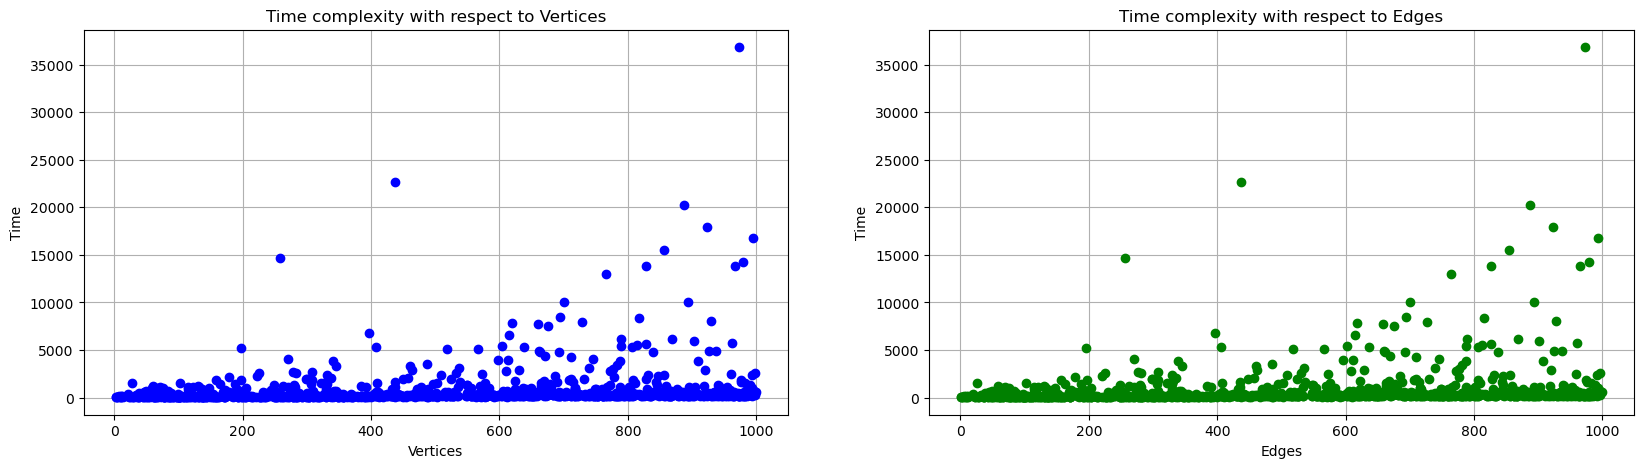

In [23]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method2_df_SPARSE['Vertices'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='b')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method2_df_SPARSE['Edges'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='g')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()

#### Dense Dataset

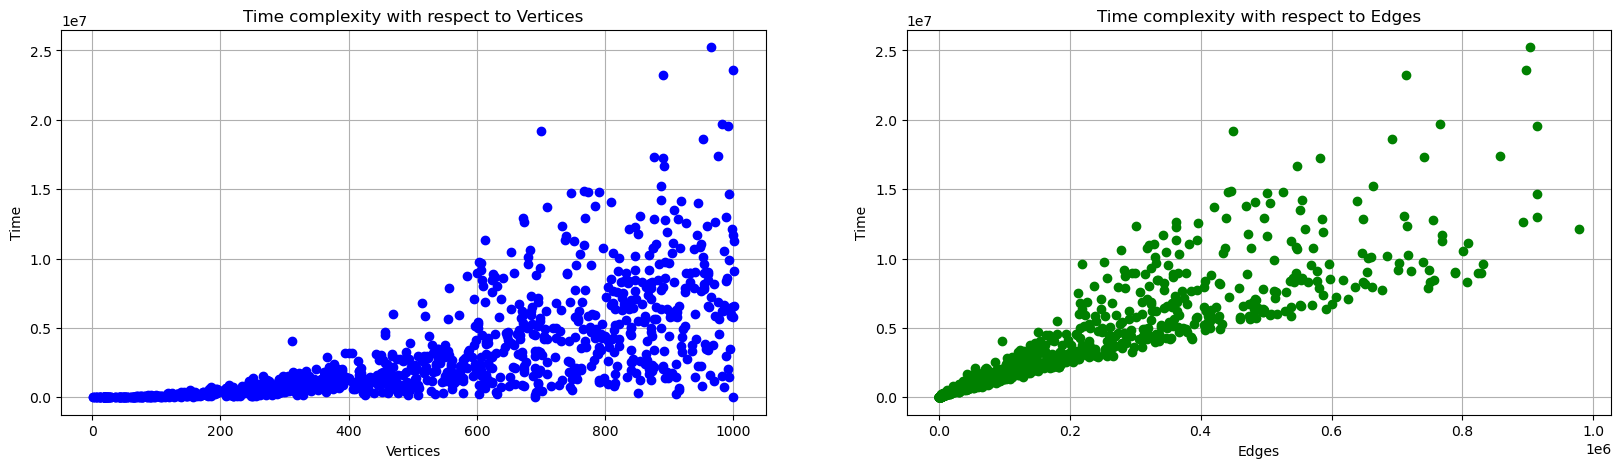

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Empirical data for Method 1 with respect to Vertices
ax[0].plot(method1_df_dense['Vertices'], method1_df_dense['Time Array (Method 1)'], 'o', color='b', label='Empirical Data')
ax[0].plot(df_dense['Vertices'], df_dense['Matrix_Array_Complexity'], color='red', linestyle='--', label='Theoretical (Vertices)')
ax[0].set_title(f'Time Complexity with Respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)
ax[0].legend()

# Empirical data for Method 1 with respect to Edges
ax[1].plot(method1_df_dense['Edges'], method1_df_dense['Time Array (Method 1)'], 'o', color='g', label='Empirical Data')
ax[1].plot(df_dense['Edges'], df_dense['Matrix_Array_Complexity'], color='orange', linestyle='--', label='Theoretical (Edges)')
ax[1].set_title(f'Time Complexity with Respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)
ax[1].legend()

plt.show()


#### SPARSE and Dense Combined

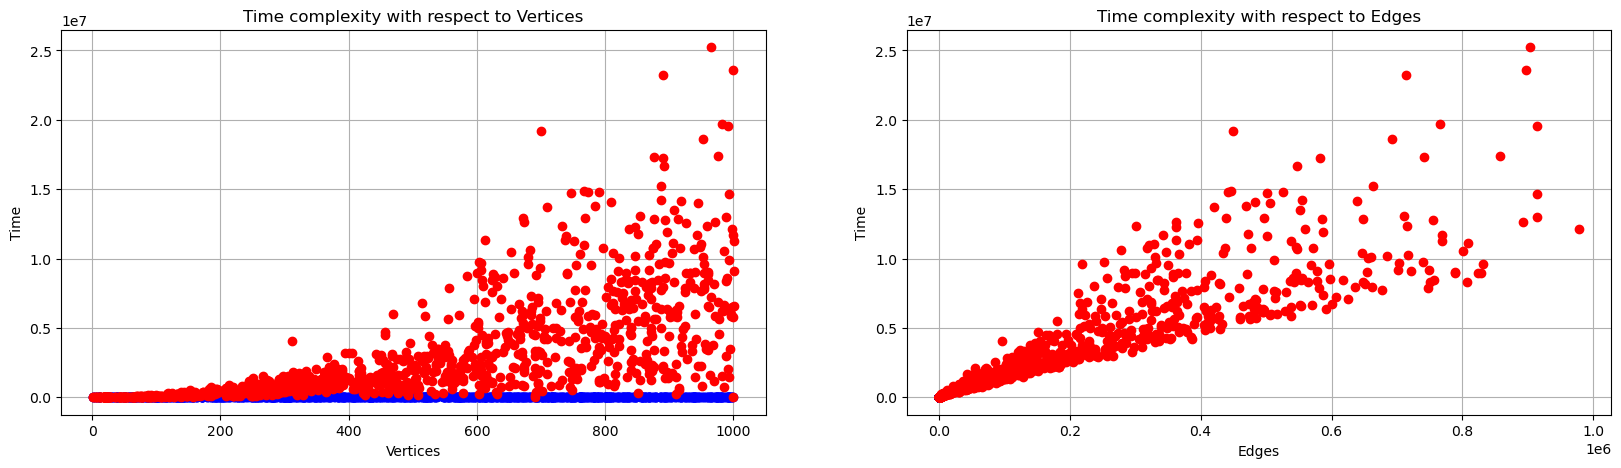

In [27]:
fig, ax = plt.subplots(1,2, figsize=(20, 5))
   
ax[0].plot(method2_df_SPARSE['Vertices'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='b')
ax[0].plot(method2_df_dense['Vertices'], method2_df_dense['Time Array (Method 2)'], 'o', color='r')
ax[0].set_title(f'Time complexity with respect to Vertices')
ax[0].set_xlabel('Vertices')
ax[0].set_ylabel('Time')
ax[0].grid(True)

ax[1].plot(method2_df_SPARSE['Edges'], method2_df_SPARSE['Time Array (Method 2)'], 'o', color='b')
ax[1].plot(method2_df_dense['Edges'], method2_df_dense['Time Array (Method 2)'], 'o', color='r')
ax[1].set_title(f'Time complexity with respect to Edges')
ax[1].set_xlabel('Edges')
ax[1].set_ylabel('Time')
ax[1].grid(True)

plt.show()